<a href="https://colab.research.google.com/github/raneymjohnGit/Austin_TX_House_Listings/blob/jayanbranch/Housing_Data_Feature_Extraction_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from termcolor import colored as cl # text customization
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = "https://raw.githubusercontent.com/raneymjohnGit/Austin_TX_House_Listings/jayanbranch/Jayan/Resources/AustinHousingDataRough.csv"
df = pd.read_csv(url)
pd.options.display.max_columns = None
df.head(10)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000,5,9/2/2019,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125,1,7/31/2019,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
2,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000,4,8/8/2018,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
3,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900,3,10/31/2018,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
4,60134835,pflugerville,15009 Drusillas Dr,78660,"Wonderful home, freshly painted throughout, ne...",30.439404,-97.658035,1.98,0,True,True,False,True,False,False,Single Family,0,2002,219900,2,10/10/2018,10,2018,Agent Provided,21,0,3,1,0,0,0,0,0,5140.0,1422,1,0,1,1,1.166667,4.000000,1223,14,3.0,3,2,60134835_47efc51704a66b45a8a134022ceeddb1-p_f.jpg
5,60134833,pflugerville,1104 Traci Michelle Dr,78660,Solid 3 bed 2 bath with formal dining/living c...,30.439096,-97.657959,1.98,0,True,True,False,True,False,False,Single Family,0,2002,225000,1,9/19/2019,9,2019,Agent Provided,16,0,2,1,1,1,0,0,0,3811.0,1870,1,0,1,1,1.166667,4.000000,1223,14,2.0,3,2,60134833_aa596c71096f40a535ce679c788cae36-p_f.jpg
6,83827468,del valle,6808 Plains Crest Dr,78617,Beautiful 3 bed 2.5 bath home in great locatio...,30.160702,-97.638123,1.98,2,True,True,True,True,False,False,Single Family,2,2013,194800,1,9/11/2018,9,2018,Agent Provided,23,0,3,2,0,0,0,0,0,5183.0,1422,1,0,1,1,1.200000,3.000000,1615,14,3.0,3,2,83827468_017e0605bf1c5f86c4e18c99dd649432-p_f.jpg
7,241930967,del valle,12612 Stoney Ridge Bnd,78617,"12612 Stoney Ridge Bnd, Del Valle, TX 78617 is...",30.159338,-97.633354,1.98,0,True,True,False,True,False,False,Single Family,0,2016,250000,1,4/12/2019,4,2019,Agent Provided,37,0,4,1,0,0,0,0,0,4965.0,2281,1,0,1,1,1.200000,3.000000,1615,14,3.0,3,2,241930967_25b11677848df21523b38fd1f11fda1e-p_f...
8,64520966,del valle,11601 Arrowmound Pass,78617,Wonderful home in Del Valle. No neighbors beh...,30.154284,-97.650581,1.98,0,True,True,False,True,False,False,Single Family,0,2003,200000,1,12/15/2018,12,2018,Agent Provided,16,0,4,1,0,0,0,0,0,6926.0,1326,1,0,1,1,1.833333,3.000000,1615,14,2.0,3,1,64520966_afb0bd83030f2bbe9c70c186b01967f1-p_f.jpg
9,70341946,del valle,6004 Arnhem Cv,78617,View website: http://6004arnhem.IsNow4Sale.com...,30.168758,-97.616470,1.98,2,True,True,True,

In [3]:
print(cl(df.dtypes, attrs = ['bold']))

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [4]:
print(cl(df.isnull().sum(), attrs = ['bold']))

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [5]:
df2 = df.drop(['city','description','streetAddress','homeType','latest_saledate','latestPriceSource','homeImage'], axis=1)
print(cl(df.dtypes, attrs = ['bold']))

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [6]:
df2['zipcode'] = df2['zipcode'].astype(str)
print(cl(df2.dtypes, attrs = ['bold']))

zpid                            int64
zipcode                        object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommuni

In [7]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df2[['zipcode']])
df2[one_hot.categories_[0]] = encoded.toarray()

In [8]:
df2.drop(['zipcode'], axis=1)

,zpid,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,78617,78619,78653,78660,78701,78702,78703,78704,78705,78717,78719,78721,78722,78723,78724,78725,78726,78727,78728,78729,78730,78731,78732,78733,78734,78735,78736,78737,78738,78739,78741,78742,78744,78745,78746,78747,78748,78749,78750,78751,78752,78753,78754,78756,78757,78758,78759
0,111373431,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,2,2012,305000,5,9,2019,39,0,5,2,1,3,0,1,0,6011.0,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2084491383,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,0,2018,256125,1,7,2019,2,0,4,1,0,1,0,0,0,7840.0,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,120901374,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,2,2013,240000,4,8,2018,9,0,0,2,0,0,0,0,0,6098.0,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60134862,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,0,2002,239900,3,10,2018,27,0,0,1,0,0,0,0,0,6708.0,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60134835,30.439404,-97.658035,1.98,0,True,True,False,True,False,False,0,2002,219900,2,10,2018,21,0,3,1,0,0,0,0,0,5140.0,1422,1,0,1,1,1.166667,4.000000,1223,14,3.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2086977545,30.324541,-97.736046,1.98,6,False,True,True,True,False,False,6,1965,495000,5,4,2019,8,0,3,3,0,0,0,0,0,7685.0,1021,1,0,1,1,0.766667,7.000000,1189,16,1.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9668,29411543,30.326372,-97.734268,1.98,1,False,True,True,True,False,False,1,1949,445000,4,4,2018,28,0,1,3,0,0,0,0,0,6969.0,1314,1,0,1,1,0.666667,7.000000,1189,16,1.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9669,29413022,30.327753,-97.736885,1.98,0,False,True,False,True,False,False,0,1941,369900,7,5,2019,10,0,3,1,0,1,0,0,0,7448.0,1209,1,0,1,1,0.666667,7.000000,1189,16,1.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [29]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X = df2.drop(['zpid','latestPrice'], axis = 1)
y = df2['latestPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
clf = RandomForestRegressor(n_estimators=300)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)



0.40747529782137626

In [31]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()


array([ True,  True,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [32]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

13

In [33]:
print(selected_feat)


Index(['zipcode', 'latitude', 'longitude', 'hasCooling', 'hasHeating',
       'yearBuilt', 'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'numOfBathrooms', 'numOfBedrooms'],
      dtype='object')


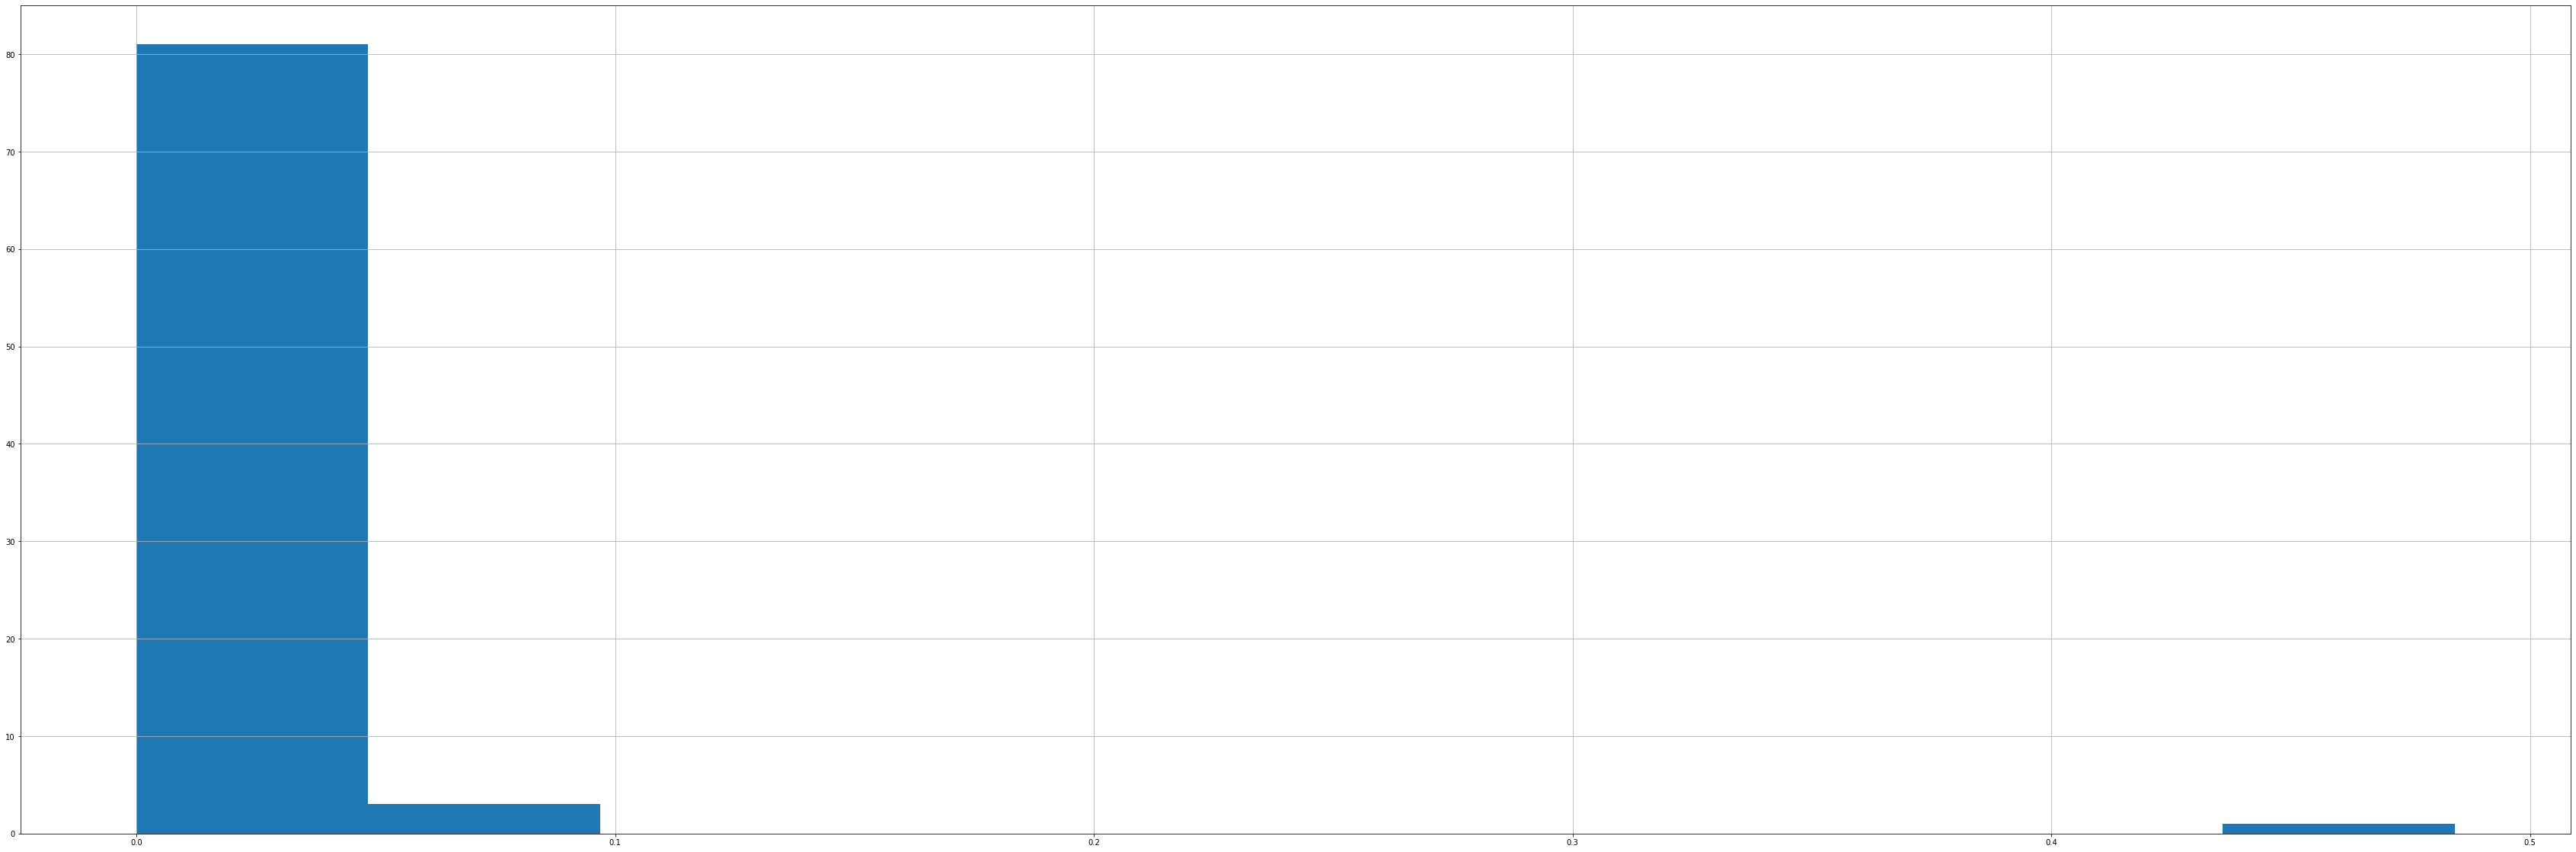

In [41]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

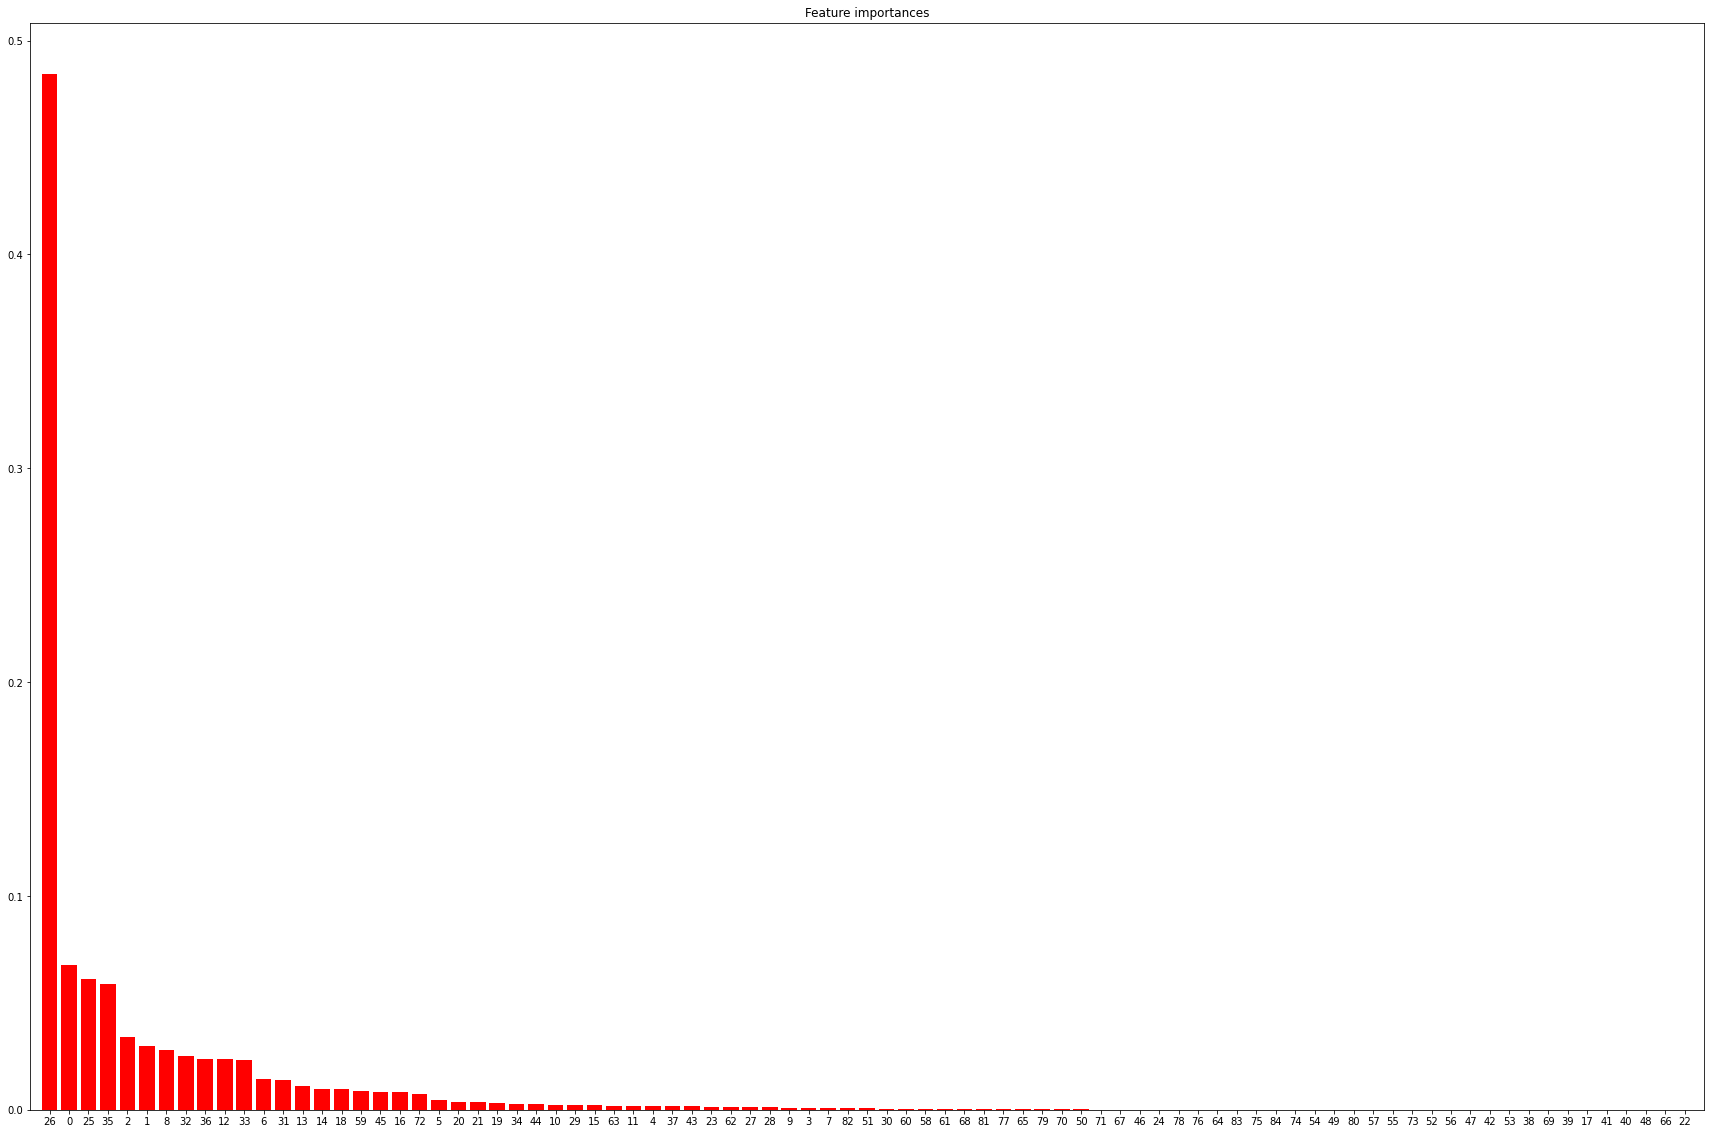

In [40]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.rcParams["figure.figsize"] = (60,20)
plt.show()


In [44]:
list(enumerate(X.columns))

[(0, 'zipcode'),
 (1, 'latitude'),
 (2, 'longitude'),
 (3, 'propertyTaxRate'),
 (4, 'garageSpaces'),
 (5, 'hasAssociation'),
 (6, 'hasCooling'),
 (7, 'hasGarage'),
 (8, 'hasHeating'),
 (9, 'hasSpa'),
 (10, 'hasView'),
 (11, 'parkingSpaces'),
 (12, 'yearBuilt'),
 (13, 'numPriceChanges'),
 (14, 'latest_salemonth'),
 (15, 'latest_saleyear'),
 (16, 'numOfPhotos'),
 (17, 'numOfAccessibilityFeatures'),
 (18, 'numOfAppliances'),
 (19, 'numOfParkingFeatures'),
 (20, 'numOfPatioAndPorchFeatures'),
 (21, 'numOfSecurityFeatures'),
 (22, 'numOfWaterfrontFeatures'),
 (23, 'numOfWindowFeatures'),
 (24, 'numOfCommunityFeatures'),
 (25, 'lotSizeSqFt'),
 (26, 'livingAreaSqFt'),
 (27, 'numOfPrimarySchools'),
 (28, 'numOfElementarySchools'),
 (29, 'numOfMiddleSchools'),
 (30, 'numOfHighSchools'),
 (31, 'avgSchoolDistance'),
 (32, 'avgSchoolRating'),
 (33, 'avgSchoolSize'),
 (34, 'MedianStudentsPerTeacher'),
 (35, 'numOfBathrooms'),
 (36, 'numOfBedrooms'),
 (37, 'numOfStories'),
 (38, '78617'),
 (39, '786